# Students info
- Student number: s3804803
- Student name: Nguyen Bao Ngan

# 1. Preprocessing

In [9]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# Loading data and check if it's loaded properly
df = pd.read_csv("Paitients_Files_Train.csv", delimiter=",")
df.head(10) 

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [11]:
# drop 2 irrelevant columns: ID and Insurance
df.drop(columns="ID", inplace=True)
df.drop(columns="Insurance", inplace=True)

In [12]:
# rename the column so that it's easier to evaluate them later
df = df.rename(columns={
    "PRG": "BGlucose",
    "PR": "BPressure",
    "PL": "B1",
    "SK": "B2",
    "TS": "B3",
    "BD2": "B4",
    "M11": "BMI"
})

## 1.1 Check data types, null values
- According to the below table, 10 features don't have any missing values, 599 out 599 is non-null. However, in the first 15 records, we see that there are some value = 0 ?, so we need look it up to see if 0 is valid value for those columns.

In [13]:
# Inspect data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BGlucose   599 non-null    int64  
 1   B1         599 non-null    int64  
 2   BPressure  599 non-null    int64  
 3   B2         599 non-null    int64  
 4   B3         599 non-null    int64  
 5   BMI        599 non-null    float64
 6   B4         599 non-null    float64
 7   Age        599 non-null    int64  
 8   Sepssis    599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


In [14]:
pd.isna(df).sum()

BGlucose     0
B1           0
BPressure    0
B2           0
B3           0
BMI          0
B4           0
Age          0
Sepssis      0
dtype: int64

In [15]:
df.describe()

,BGlucose,B1,BPressure,B2,B3,BMI,B4,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Data Analysis
- There is lots of missing values that need to be replaced.

- **Mass Index**:Mostly overweight.
- **Age**: very young age group. Usually sepsis is detected in patient over 50 years

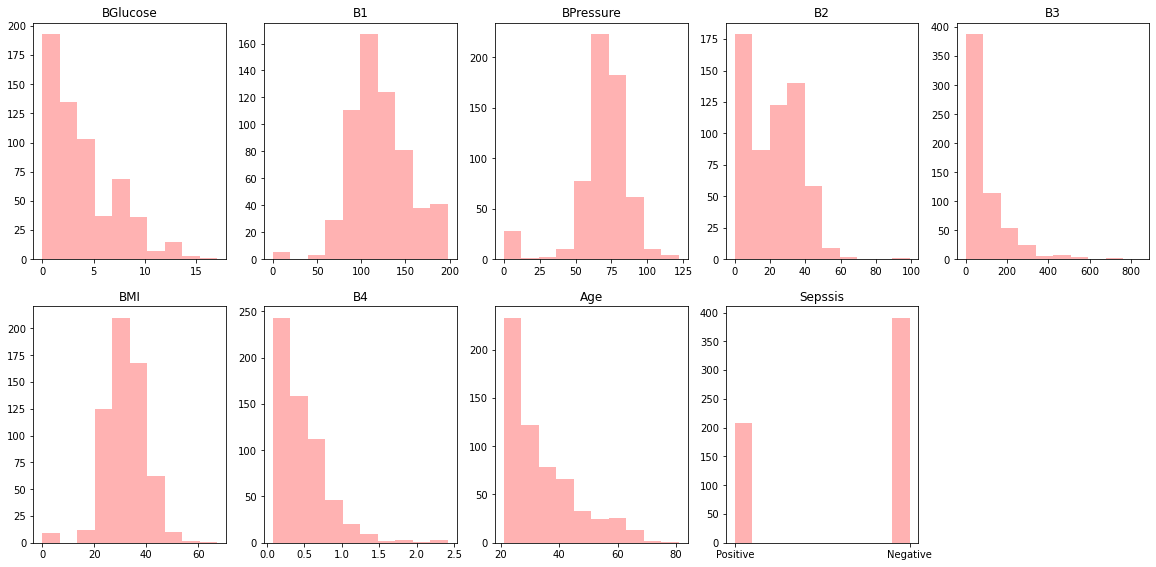

In [16]:
# More visualization to analysis dataset
plt.figure(figsize= (20,20))
n = len(df.columns)

for i, col in enumerate(df.columns):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color="r")
    plt.title(col)

In [17]:
# Encode target value

from sklearn.preprocessing import LabelEncoder

Y = df.values[:, -1].astype(str)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

print(Y[:5])

[1 0 1 0 1]


In [18]:
# drop target column
target = df.drop(columns="Sepssis", inplace=True)



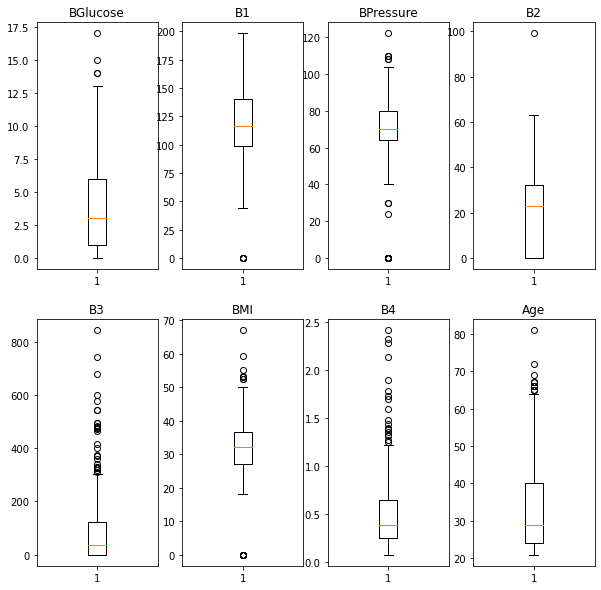

In [19]:

# Boxplot for a range of value
import math
fig, ax = plt.subplots(2,4,figsize=(10,10))

n = len(df.columns)
for i, col in enumerate(df.columns):
    if math.floor(i / 4) >= len(ax):
        continue
    ax_col = ax[math.floor(i / 4), i % 4]
    ax_col.boxplot(df[col])
    ax_col.set_title(col)


Why there are so many outliers...? How should we handle them, because they also appear in test file...

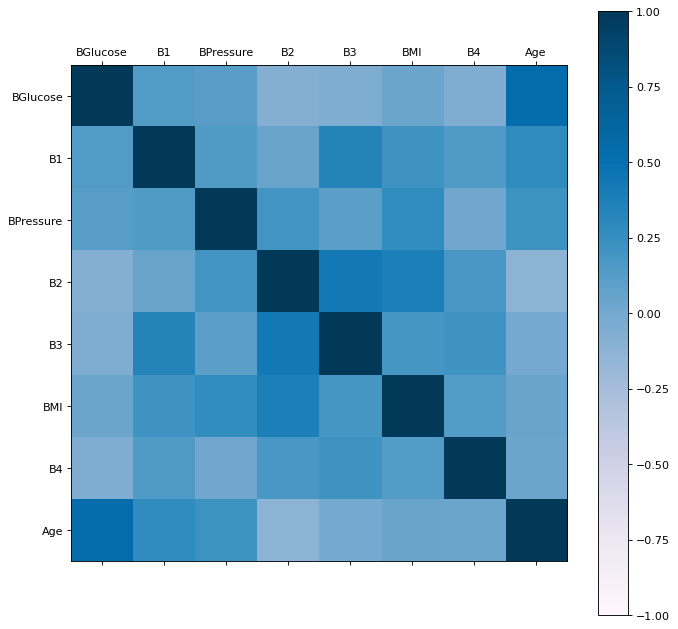

In [20]:
# heatmap
correlations = df.corr()
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,n,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Comment: No depedence detected

# 2. Model Development

## 2.1 Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
# instantiate the model (using the default parameters)
raw_scaler = StandardScaler()
raw_scaler.fit(df)
X_scaled = raw_scaler.transform(df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=6)

lr_model = LogisticRegressionCV(cv=10, solver="sag",Cs= 4, n_jobs=-1, scoring="roc_auc")

lr_model.fit(X_train, y_train)
accuracy_train = lr_model.score(X_train, y_train)
print("Training Accuracy: %0.3f " % (accuracy_train * 100))

lr_pred = lr_model.predict(X_test)

Training Accuracy: 82.305 


In [22]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, lr_pred)

Text(0.5, 257.44, 'Predicted label')

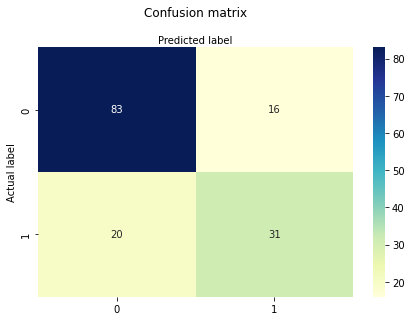

In [23]:
class_names=["Positive","Negative"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
# Evaluation framework
from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))
# print("Precision:",metrics.precision_score(y_test, lr_pred))
# print("Recall:",metrics.recall_score(y_test, lr_pred))
print(metrics.classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.66      0.61      0.63        51

    accuracy                           0.76       150
   macro avg       0.73      0.72      0.73       150
weighted avg       0.76      0.76      0.76       150



**Comments**: 
- The accuracy of the model on validation data set is 76%. 
- The model is better in predict negative sepsis than the positive one. Is that a good thing?

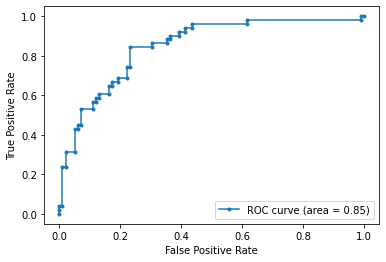

In [25]:
# plot auc, roc
from sklearn.metrics import roc_auc_score, roc_curve
model_probs = lr_model.predict_proba(X_test)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## 2.2 Ridge Regression


In [26]:
from sklearn.linear_model import RidgeClassifier
ridge_model = RidgeClassifier().fit(X_train, y_train)
print("Training Accuracy: ", ridge_model.score(X_train, y_train))

Training Accuracy:  0.7839643652561247


In [27]:
ridge_pred = ridge_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, ridge_pred))
print("Precision:",metrics.precision_score(y_test, ridge_pred))
print("Recall:",metrics.recall_score(y_test, ridge_pred))
print(metrics.classification_report(y_test, ridge_pred))

Accuracy: 0.76
Precision: 0.6666666666666666
Recall: 0.5882352941176471
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.67      0.59      0.62        51

    accuracy                           0.76       150
   macro avg       0.73      0.72      0.72       150
weighted avg       0.75      0.76      0.76       150



## 2.3 Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtf = DecisionTreeClassifier(criterion="gini",max_features="auto", max_depth=3, random_state=3, class_weight="balanced")
# fit model

dtf.fit(X_train, y_train)

# make predictions

yhat = dtf.predict(X_test)

# calculate accuracy

accuracy = metrics.accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % dtf.score(X_test, y_test))

Accuracy: 0.667


[Text(167.4, 190.26, 'X[4] <= 0.421\ngini = 0.5\nsamples = 449\nvalue = [224.5, 224.5]'),
 Text(83.7, 135.9, 'X[7] <= -0.744\ngini = 0.489\nsamples = 340\nvalue = [186.827, 138.704]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 0.871\ngini = 0.361\nsamples = 98\nvalue = [64.582, 20.019]'),
 Text(20.925, 27.180000000000007, 'gini = 0.269\nsamples = 86\nvalue = [59.969, 11.439]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.455\nsamples = 12\nvalue = [4.613, 8.58]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 2.88\ngini = 0.5\nsamples = 242\nvalue = [122.245, 118.685]'),
 Text(104.625, 27.180000000000007, 'gini = 0.499\nsamples = 239\nvalue = [122.245, 114.395]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0.0, 4.29]'),
 Text(251.10000000000002, 135.9, 'X[6] <= -0.872\ngini = 0.424\nsamples = 109\nvalue = [37.673, 85.796]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.652\ngini = 0.433\nsamples = 10\nvalue = [6.151, 2.86]'),
 Text(188.32500

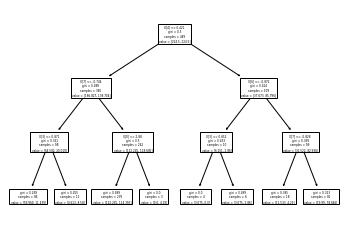

In [29]:
# plot tree
tree.plot_tree(dtf)

In [38]:
text_ = tree.export_text(dtf,feature_names=['BGlucose', 'B1', 'BPressure', 'B2', 'B3', 'BMI', 'B4', 'Age'])
print(text_)

|--- B3 <= 0.42
|   |--- Age <= -0.74
|   |   |--- B2 <= 0.87
|   |   |   |--- class: 0
|   |   |--- B2 >  0.87
|   |   |   |--- class: 1
|   |--- Age >  -0.74
|   |   |--- BGlucose <= 2.88
|   |   |   |--- class: 0
|   |   |--- BGlucose >  2.88
|   |   |   |--- class: 1
|--- B3 >  0.42
|   |--- B4 <= -0.87
|   |   |--- B2 <= 0.65
|   |   |   |--- class: 0
|   |   |--- B2 >  0.65
|   |   |   |--- class: 0
|   |--- B4 >  -0.87
|   |   |--- Age <= -0.83
|   |   |   |--- class: 0
|   |   |--- Age >  -0.83
|   |   |   |--- class: 1



## 2.4 Random Forrest and Gaussian
- source: https://github.com/dataprofessor/code/blob/master/python/ROC_curve.ipynb

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# random forrest
rf = RandomForestClassifier(max_depth=5,max_features=8, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=8, n_estimators=500)

In [ ]:
# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Use AUC to compare models

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.852
Naive Bayes: AUROC = 0.838


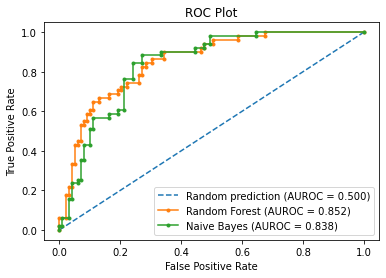

In [ ]:
# Plot curves
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()